In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
job= pd.read_csv('C:\\Users\\Abhay\\Desktop\\DS Class Notes\\Python\\Final Project\\Analyze online job posting\\data job posts.csv')

In [3]:
job.head(5)

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [4]:
def chck_miss(x):
    n = x.count()
    nmiss = x.isnull().sum()
    total = n + nmiss
    percmiss = (nmiss/total) * 100
    return pd.Series([n, nmiss, total, round(percmiss,2)],
                    index = ['N','NMISS','TOTAL','PERCMISS'])


In [5]:
job.apply(lambda x: chck_miss(x)).T

,N,NMISS,TOTAL,PERCMISS
jobpost,19001.0,0.0,19001.0,0.00
date,19001.0,0.0,19001.0,0.00
Title,18973.0,28.0,19001.0,0.15
Company,18994.0,7.0,19001.0,0.04
AnnouncementCode,1208.0,17793.0,19001.0,93.64
Term,7676.0,11325.0,19001.0,59.60
Eligibility,4930.0,14071.0,19001.0,74.05
Audience,640.0,18361.0,19001.0,96.63
StartDate,9675.0,9326.0,19001.0,49.08
Duration,10798.0,8203.0,19001.0,43.17


In [4]:
# we can drop variable which have more than 20-25% missing values depending on their necessity

job_df = job.drop(['AnnouncementCode','Term','Eligibility','Audience','StartDate','Duration','Notes','Attach','OpeningDate','Salary'],axis=1)

In [7]:
# 1 . Type of jobs in demand
job_demand= job_df['Title'].value_counts().head(10)
job_demand = pd.DataFrame({'Title': job_demand.index, 'Count' : job_demand.values})
job_demand

,Title,Count
0,Accountant,328
1,Chief Accountant,219
2,Medical Representative,216
3,Sales Manager,166
4,Administrative Assistant,155
5,Lawyer,151
6,Software Developer,134
7,Project Manager,117
8,English Language Courses,109
9,Web Developer,101


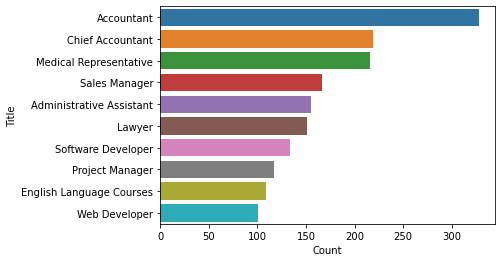

In [8]:
sns.barplot(x = 'Count', y='Title', data=job_demand)
plt.show()

In [9]:
# 2.  job nature change over years
jobOverYear = pd.DataFrame(job_df.Year.value_counts()).reset_index()
jobOverYear['Count'] = jobOverYear.Year
jobOverYear['Year'] =jobOverYear['index']
jobOverYear.drop('index', axis= 1, inplace = True)
jobOverYear = jobOverYear.sort_values(by = 'Year')
jobOverYear

,Year,Count
11,2004,875
9,2005,1138
10,2006,1116
6,2007,1538
4,2008,1785
8,2009,1191
7,2010,1511
5,2011,1697
0,2012,2149
2,2013,2009


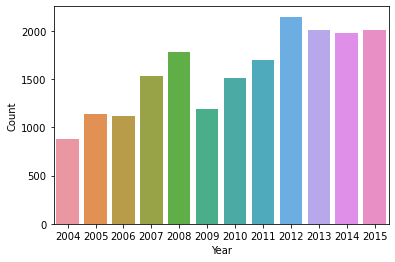

In [10]:
sns.barplot(y = 'Count', x='Year', data=jobOverYear)
plt.show()

In [11]:
# job nature change over months

jobOverMonths = pd.DataFrame(job_df.Month.value_counts()).reset_index()
jobOverMonths['Count'] = jobOverMonths.Month
jobOverMonths['Month'] =jobOverMonths['index']
jobOverMonths.drop('index', axis= 1, inplace = True)
jobOverMonths = jobOverMonths.sort_values(by = 'Month')
jobOverMonths

,Month,Count
11,1,1424
1,2,1665
0,3,1702
9,4,1466
7,5,1580
2,6,1662
6,7,1595
5,8,1613
3,9,1652
4,10,1637


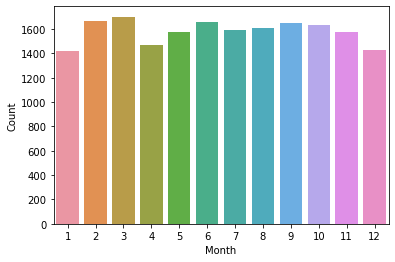

In [12]:
sns.barplot(y = 'Count', x='Month', data=jobOverMonths)
plt.show()

In [13]:
# IT and Non-IT job nature change over years

job_IT = pd.DataFrame(job_df.Year[job_df.IT==True].value_counts()).reset_index()
job_IT['Count'] = job_IT.Year
job_IT['Year'] =job_IT['index']
job_IT.drop('index', axis= 1, inplace = True)
job_IT = job_IT.sort_values(by = 'Year')
job_IT

,Year,Count
11,2004,145
9,2005,208
7,2006,225
6,2007,317
4,2008,334
10,2009,155
8,2010,224
5,2011,327
1,2012,473
3,2013,378


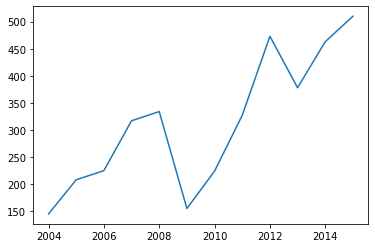

In [14]:
plt.plot('Year','Count', data=job_IT)
plt.show()

In [15]:
# Non-IT job over years

job_Non_IT = pd.DataFrame(job_df.Year[job_df.IT==False].value_counts()).reset_index()
job_Non_IT['Count'] = job_Non_IT.Year
job_Non_IT['Year'] =job_Non_IT['index']
job_Non_IT.drop('index', axis= 1, inplace = True)
job_Non_IT = job_Non_IT.sort_values(by = 'Year')
job_Non_IT

,Year,Count
11,2004,730
9,2005,930
10,2006,891
7,2007,1221
4,2008,1451
8,2009,1036
6,2010,1287
5,2011,1370
0,2012,1676
1,2013,1631


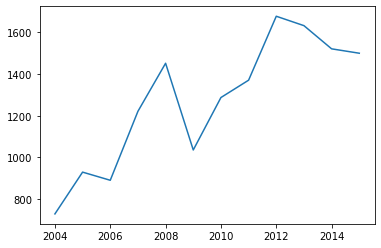

In [16]:
plt.plot('Year','Count', data=job_Non_IT)
plt.show()

In [17]:
# top companies posting jobs
com_count = job_df['Company'].value_counts().head(10)
com_count = pd.DataFrame({'Company' : com_count.index, 'Count' : com_count.values})
com_count

,Company,Count
0,ArmenTel CJSC,353
1,World Vision Armenia,239
2,Mentor Graphics Development Services CJSC,236
3,Career Center NGO,229
4,Orange Armenia,203
5,Ameriabank CJSC,196
6,Converse Bank CJSC,161
7,SAS Group LLC,150
8,UNDP Armenia Office,132
9,Energize Global Services CJSC,126


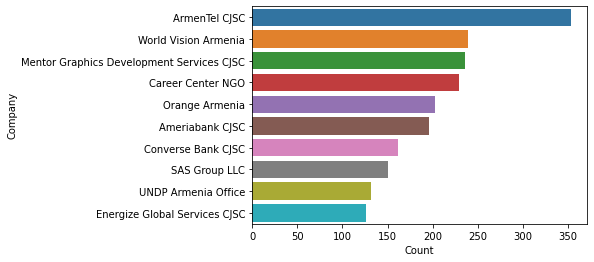

In [18]:
sns.barplot(x='Count', y='Company', data=com_count)
plt.show()

In [4]:
df = job_df[['jobpost','Title','JobDescription','JobRequirment','RequiredQual','AboutC','IT','Year']]
df.head(5)

,jobpost,Title,JobDescription,JobRequirment,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,True,2004


In [12]:
# IT job Classification

IT_df = df[['JobDescription','IT']]

In [13]:
IT_df['IT'].unique()

array([False,  True])

In [14]:
IT_df['IT'] = np.where(IT_df['IT']==True,1,0)

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
IT_df['IT'].unique()

array([0, 1])

In [16]:
# Treat Missing Values
IT_df['JobDescription'] = IT_df['JobDescription'].fillna(IT_df['JobDescription'].mode())

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
X_var = IT_df['JobDescription']
X_var

0        AMERIA Investment Consulting Company is seekin...
1                                                      NaN
2        Public outreach and strengthening of a growing...
3        The LEAD (Local Enhancement and Development fo...
4                                                      NaN
                               ...                        
18996    A tech startup of Technolinguistics based in N...
18997                                                  NaN
18998                                                  NaN
18999    San Lazzaro LLC is looking for a well-experien...
19000    "Kamurj" UCO CJSC is looking for a Lawyer in L...
Name: JobDescription, Length: 19001, dtype: object

In [18]:
Y_var = IT_df['IT']

In [9]:
import re
corpus = []

for i in range(0, len(X_var)):
    clean = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", str(X_var[i]))
    clean = re.sub(r'\W', ' ', clean)   #Not words
    clean = clean.lower()
    
    corpus.append(clean)
    

NameError: name 'X_var' is not defined

In [30]:
corpus

['ameria investment consulting company is seeking a chief financial officer this position manages the companys fiscal and administrative functions provides highly responsible and technically complex staff assistance to the executive director the work performed requires a high level of technical proficiency in financial management and investment management as well as management supervisory and administrative skills',
 'nan',
 'public outreach and strengthening of a growing network of environmental ngos businesses international organizations and public agencies will serve as primary contact between cenn and public this is a fulltime position',
 'the lead local enhancement and development for health bcc specialist will apply stateoftheart approaches in working with lgus local government units and ngos to help them to identify and address providercaused barriers to service provision as well as to identify and address supports for good service delivery by developing tools that may be adapte

In [20]:
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Lemmatization
for i in range(0 , len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   

In [21]:
# Countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words= 'english')
X = vec.fit_transform(corpus).toarray()



In [22]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# train test split
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain , YTest = train_test_split(X,Y_var,test_size = 0.3, random_state=123)

In [24]:
YTrain.unique()

array([0, 1])

In [25]:
Y_var.unique()

array([0, 1])

In [26]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(XTrain,YTrain)


C:\Users\Abhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn import metrics

test_y_acc = metrics.accuracy_score(YTest, lr.predict(XTest))
train_y_acc = metrics.accuracy_score(YTrain, lr.predict(XTrain))

print('test_score : ',test_y_acc)
print('train_score : ',train_y_acc )

test_score :  0.9317663567795124
train_score :  0.9601503759398496


In [36]:
predict = pd.DataFrame(lr.predict(X), columns=['Predicted'])

final = pd.concat([IT_df,predict], axis=1)


,JobDescription,IT,Predicted
0,AMERIA Investment Consulting Company is seekin...,0,0
1,NaN,0,0
2,Public outreach and strengthening of a growing...,0,0
3,The LEAD (Local Enhancement and Development fo...,0,0
4,NaN,1,0
5,Saleswoman will sell menswear and accessories.,0,0
6,The Armenian Branch Office of the Open Society...,0,0
7,NaN,0,0
8,NaN,0,0
9,The incumbent assists in coordinating INL-fund...,0,0


In [37]:
final.to_csv('final.csv')

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
pred_y = lr.predict(XTest)
report = classification_report(YTest,pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4545
           1       0.93      0.72      0.81      1156

    accuracy                           0.93      5701
   macro avg       0.93      0.85      0.88      5701
weighted avg       0.93      0.93      0.93      5701



# Job Nature Change over years


In [35]:
# Job Nature 
# for this part we will consider the Title

job_yr= pd.DataFrame(job_df[['Title','Year']])


In [5]:
title = job_yr['Title']

NameError: name 'job_yr' is not defined

In [6]:
import re

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", " ", text)
    text = re.sub(r'\W+', ' ', text)
    return(text)

In [38]:
job_yr.Title = job_yr.Title.astype(str)

In [39]:
job_yr.Title = job_yr.Title.apply(lambda x: clean_text(x))

In [40]:
from nltk.corpus import stopwords

sw = stopwords.words('english')
sw.extend(['aa','aaa','aac'])

In [41]:
def stopwrd(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    return(text)

In [42]:
job_yr.Title = stopwrd(job_yr.Title)

In [43]:
from textblob import Word

def lem(text):
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    return(text)

In [44]:
job_yr.Title = lem(job_yr.Title)

In [45]:
job_yr.Title

0                                  chief financial officer
1        fulltime community connection intern paid inte...
2                                      country coordinator
3                                           bcc specialist
4                                       software developer
                               ...                        
18996                       senior creative ux ui designer
18997                         category development manager
18998                        operational marketing manager
18999                          head online sale department
19000                              lawyer legal department
Name: Title, Length: 19001, dtype: object

In [46]:
#Since there are 12 years, we can take 3 or 4 years at a time

# Year 2004 -2007
yr04_07 = job_yr[(job_yr.Year>=2004) & (job_yr.Year<=2007)]
yr04_07 = yr04_07['Title']
yr04_07 = list(yr04_07)

yr04_07

['chief financial officer',
 'fulltime community connection intern paid internship',
 'country coordinator',
 'bcc specialist',
 'software developer',
 'saleswoman',
 'chief accountant finance assistant',
 'nonpaid part full time programmatic intern',
 'assistant managing director',
 'program assistant inl fsn fp*',
 'shortterm travel grant stg program',
 'nonpaid part full time administrative intern',
 'chief party cop',
 'community development capacity building conflict',
 'general manager',
 'network administrator',
 'utopian world championship',
 'country economist nob',
 'driver logistics assistant',
 'graphic designer',
 'administrative assistant',
 'lawyer',
 'marketing advisor',
 'chief supervisor program department',
 'journalism trainer',
 'deputy program director',
 'student forum student conference debate forum april',
 'reporting diversity workshop journalist',
 'reporting diversity workshop journalist',
 'chief accountant',
 'consultant shortterm',
 'guard fsn fpcc*',
 't

In [47]:
t1= ' '.join(yr04_07)

In [48]:
t1

'chief financial officer fulltime community connection intern paid internship country coordinator bcc specialist software developer saleswoman chief accountant finance assistant nonpaid part full time programmatic intern assistant managing director program assistant inl fsn fp* shortterm travel grant stg program nonpaid part full time administrative intern chief party cop community development capacity building conflict general manager network administrator utopian world championship country economist nob driver logistics assistant graphic designer administrative assistant lawyer marketing advisor chief supervisor program department journalism trainer deputy program director student forum student conference debate forum april reporting diversity workshop journalist reporting diversity workshop journalist chief accountant consultant shortterm guard fsn fpcc* training officer chauffeur fsn fpbb* demographic analysis workshop programmer tester receptionist german internship young practici

In [49]:
from wordcloud import WordCloud
wc = WordCloud().generate(t1)

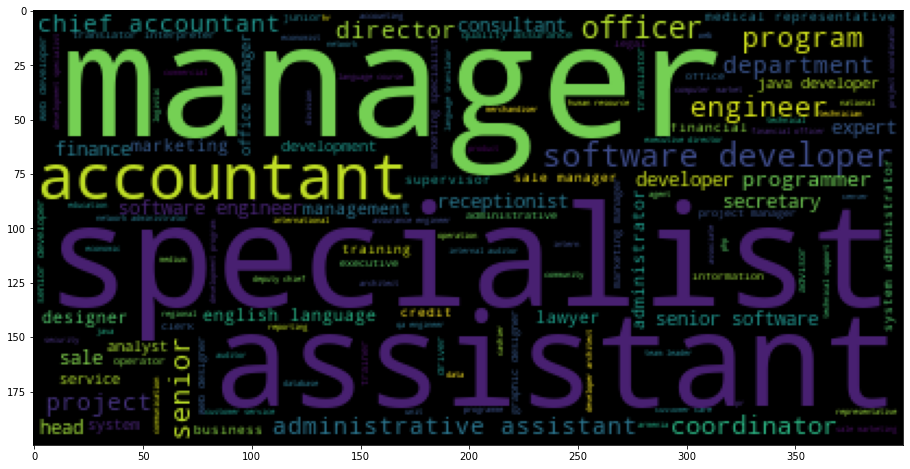

In [50]:
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wc)
plt.show()

In [51]:
# Year 2008 - 2011
yr08_11 = job_yr[(job_yr.Year>=2008) & (job_yr.Year<=2011)]
yr08_11 = yr08_11['Title']
yr08_11 = list(yr08_11)

yr08_11

['study united state institute summer',
 'category specialist',
 'c senior software developer',
 'graphic designer',
 'scm engineer sw',
 'net c c software developer',
 'manual tester',
 'sale spare part department manager',
 'capital market unit head',
 'mutual fund unit senior specialist',
 'hivaids prevention among lgbt officer',
 'procurement manager',
 'trust management unit senior specialist',
 'system engineer',
 'office assistant secretary',
 'tester quality assurance engineer',
 'graphic designer',
 'legal advisor',
 'aspnet developer',
 'technical writer',
 'merchant bank unit senior specialist',
 'corporate finance unit senior specialist',
 'capital market unit senior specialist',
 'software engineer',
 'junior qa java developer',
 'local legal advisor',
 'copy center operator',
 'director advertising salesperson',
 'economist',
 'training program examination institute',
 'legal adviser',
 'senior software developer',
 'cashier',
 'banking service manager',
 'specialist meth

In [52]:
t2= ' '.join(yr08_11)

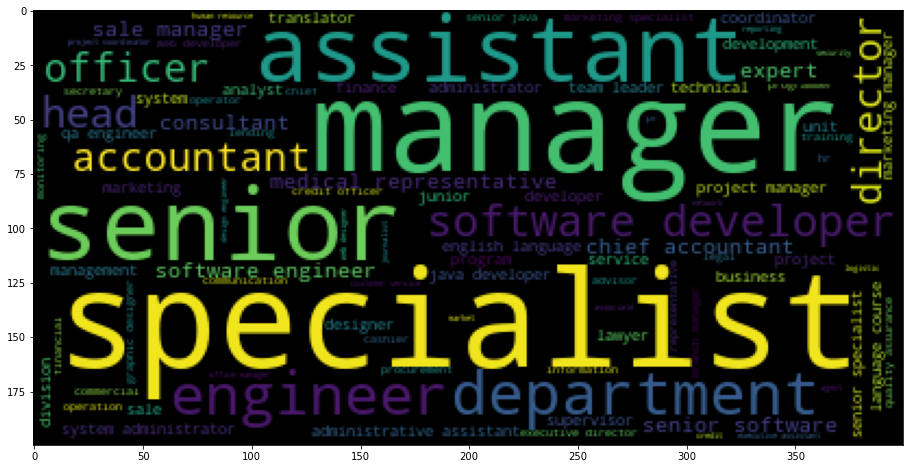

In [53]:
wc2 = WordCloud().generate(t2)
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wc2) 
plt.show()

In [54]:
# Year 2012 - 2015
yr12_15 = job_yr[(job_yr.Year>=2012) & (job_yr.Year<=2015)]
yr12_15 = yr12_15['Title']
yr12_15 = list(yr12_15)

yr12_15

['education officer',
 'project manager operation department',
 'audit manager',
 'legal assistant',
 'sale department manager',
 'supermarket director',
 'lawyer',
 'net developer',
 'senior budgeting controlling specialist',
 'server administrator',
 'senior software developer',
 'specialist commercial affair department',
 'team leader expert monitoring enpi implementation',
 'manager commercial department',
 'qa test engineer',
 'brand manager',
 'investment officer',
 'educational coordinator',
 'receptionist administrative assistant',
 'store manager',
 'regional network coordinator',
 'credit officer sevan branch',
 'senior manager support service',
 'credit officer artashat branch',
 'software engineer',
 'contractor intern',
 'senior technical marketing engineer',
 'commercial representative',
 'head sale department',
 'territory executive',
 'loan recovery specialist',
 'senior software engineer',
 'quality assurance engineer',
 'business consultant',
 'lawyer',
 'software eng

In [55]:
t3= ' '.join(yr12_15)

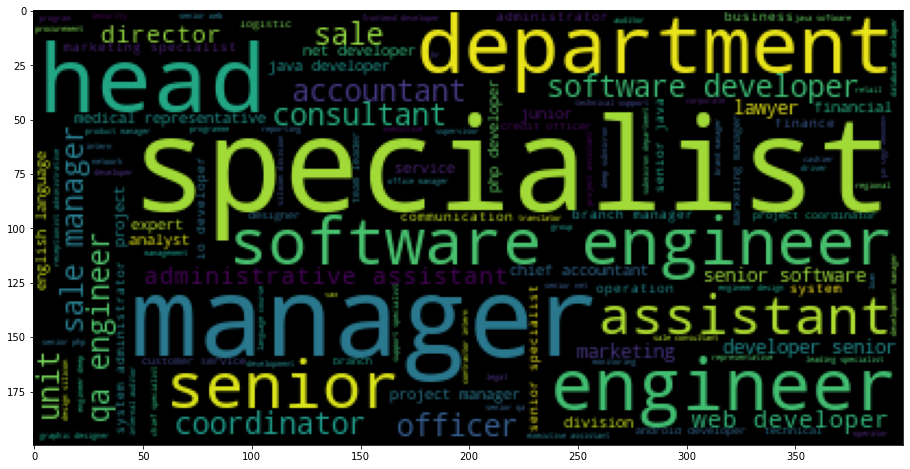

In [56]:
wc3 = WordCloud().generate(t3)
plt.figure(figsize = (16, 8), facecolor = None) 
plt.imshow(wc3) 
plt.show()

# similarity of jobs


In [7]:
df = job_df[['Title','jobpost']]

In [35]:
df

,Title,jobpost
0,Chief Financial Officer,AMERIA Investment Consulting Company\nJOB TITL...
1,Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX...
2,Country Coordinator,Caucasus Environmental NGO Network (CENN)\nJOB...
3,BCC Specialist,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...
4,Software Developer,Yerevan Brandy Company\nJOB TITLE: Software D...
...,...,...
18996,Senior Creative UX/ UI Designer,Technolinguistics NGO\n\n\nTITLE: Senior Crea...
18997,Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ..."
18998,Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ..."
18999,Head of Online Sales Department,San Lazzaro LLC\n\n\nTITLE: Head of Online ...


In [8]:
df.jobpost = df.jobpost.astype(str)
df.Title = df.Title.astype(str)

C:\Users\Abhay\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df.jobpost = df.jobpost.apply(lambda x: clean_text(x))
df.Title = df.Title.apply(lambda x: clean_text(x))

In [10]:
from nltk import word_tokenize

df['jobpost_token'] = df['jobpost'].map(word_tokenize)
df['Title_token'] = df['Title'].map(word_tokenize)

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
from nltk.corpus import stopwords
stopwrd = set(stopwords.words('english'))

df['jobpost_token'] = df['jobpost_token'].apply(lambda x: [item for item in x if item not in stopwrd])
df['Title_token'] = df['Title_token'].apply(lambda x: [item for item in x if item not in stopwrd])

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [12]:
df['jobpost_token_str'] = df['jobpost_token'].apply(lambda x : " ".join(x))
df['title_token_str'] = df['Title_token'].apply(lambda x : " ".join(x))

C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abhay\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df

,Title,jobpost,jobpost_token,Title_token,jobpost_token_str,title_token_str
0,chief financial officer,ameria investment consulting company job title...,"[ameria, investment, consulting, company, job,...","[chief, financial, officer]",ameria investment consulting company job title...,chief financial officer
1,full time community connections intern paid in...,international research exchanges board irex ti...,"[international, research, exchanges, board, ir...","[full, time, community, connections, intern, p...",international research exchanges board irex ti...,full time community connections intern paid in...
2,country coordinator,caucasus environmental ngo network cenn job ti...,"[caucasus, environmental, ngo, network, cenn, ...","[country, coordinator]",caucasus environmental ngo network cenn job ti...,country coordinator
3,bcc specialist,manoff group job title bcc specialist position...,"[manoff, group, job, title, bcc, specialist, p...","[bcc, specialist]",manoff group job title bcc specialist position...,bcc specialist
4,software developer,yerevan brandy company job title software deve...,"[yerevan, brandy, company, job, title, softwar...","[software, developer]",yerevan brandy company job title software deve...,software developer
...,...,...,...,...,...,...
18996,senior creative ux ui designer,technolinguistics ngo title senior creative ux...,"[technolinguistics, ngo, title, senior, creati...","[senior, creative, ux, ui, designer]",technolinguistics ngo title senior creative ux...,senior creative ux ui designer
18997,category development manager,coca cola hellenic bottling company armenia c...,"[coca, cola, hellenic, bottling, company, arme...","[category, development, manager]",coca cola hellenic bottling company armenia cj...,category development manager
18998,operational marketing manager,coca cola hellenic bottling company armenia c...,"[coca, cola, hellenic, bottling, company, arme...","[operational, marketing, manager]",coca cola hellenic bottling company armenia cj...,operational marketing manager
18999,head of online sales department,san lazzaro llc title head of online sales dep...,"[san, lazzaro, llc, title, head, online, sales...","[head, online, sales, department]",san lazzaro llc title head online sales depart...,head online sales department


In [34]:
df = df.reset_index()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,3))

jobposttf_idf = vectorizer.fit_transform(df['jobpost_token_str'])




In [38]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_score = cosine_similarity(jobposttf_idf)

In [35]:
def get_title_from_index(index):
    return df[df.index == index]["Title"].values[0]
def get_index_from_title(Title):
    return df[df.Title == Title]["index"].values[0]

In [63]:
# lets assume we are finding similar title for - chief financial officer

title_similar_to = 'chief financial officer'

title_index = get_index_from_title(title_similar_to)

similar_titles = list(enumerate(cosine_score[title_index]))

In [64]:
sorted_similar_titles = sorted(similar_titles,key=lambda x:x[1],reverse=True)[2:7]

In [66]:

i=0
print("Top 5 similar titles to "+title_similar_to+" are:\n")
for element in sorted_similar_titles:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar titles to chief financial officer are:

marketing manager
sales manager
chief financial officer
accountant financial officer
chief accountant
